In [1]:
# import libraries to Script 
import pandas as pd
import requests
import json
from bs4 import BeautifulSoup
import time

In [2]:
# Script the pakemon weppage
list_of_pokemons = []

for i in range(1,810):
    url = "https://www.pokemon.com/us/pokedex/{}".format(i)
    dict_ = {}
    page = requests.get(url)

    soup = BeautifulSoup(page.content, 'html.parser')

    names = soup.find(class_="pokedex-pokemon-pagination-title")

    dict_['name'] = names.find('div').get_text().strip().split('\n')[0]
    stats = soup.find(class_ = 'pokemon-stats-info active')
    value = stats.find_all( class_='meter')

    dict_['hp'] = value[0]['data-value']

    dict_['attack'] = value[1]['data-value']

    dict_['defense'] = value[2]['data-value']

    dict_['s_attack'] = value[3]['data-value'] 

    dict_['s_defense'] = value[4]['data-value']

    dict_['speed'] = value[5]['data-value']
    
    ability = soup.find(class_="pokemon-ability-info color-bg color-lightblue match active")
    abilities = ability.find_all(class_ = 'column-7')
    abi = abilities[0].find_all('span', class_="attribute-value")

    dict_['height'] = 12*(int(abi[0].get_text().strip()[0]))+int(abi[0].get_text().strip()[3:5])

    dict_['weight'] = abi[1].get_text().split()[0]
    abi_1  = abilities[1].find_all('span', class_="attribute-value")  
    if len(abi_1)<=1:
        dict_['category'] = abi_1[0].get_text()

 
    else:
        dict_['category'] = abi_1[0].get_text()
        dict_['ability'] = abi_1[1].get_text()
    
    type_ = soup.find(class_ = 'dtm-type')
    for i in range(0,len((type_.find_all('a')))):
        if i ==0:
            dict_['Target'] = type_.find_all('a')[i].get_text().strip()
#         else:
            
#             if type_.find_all('a')[i].get_text().strip():
#                 dict_[type_.find_all('a')[i].get_text().strip()] = 1

    weak = soup.find(class_ = 'dtm-weaknesses')
    for i in range(0,len(weak.find_all('span'))):
        if weak.find_all('span')[i].get_text().strip():
            dict_[weak.find_all('span')[i].get_text().strip()] = 1

    list_of_pokemons.append(dict_)



In [3]:
# insert into dataframe
df = pd.DataFrame(list_of_pokemons)
df = df.fillna(0)
df.head()

In [4]:
# too much category, so create 3 grouos
# group_water = water(114) , ice(23)
# group_normal = normal(105), grass(78), bug(72) , rock(46), ground(32), fighting(29)
# group_special = psychic(53), electric(40), poison(34), fire(53), dark(29), dragon(27), ghost(27), stell(26), fairy(18), flying(3)
df.Target = ['water' if i == 'Water' or i =='ice' else 'normal' if i =='Normal' or i =='Grass' or i =='Bug' or i== 'Rock' or i == 'Ground' or i =='Fighting' else 'special' for i in df.Target ]

In [5]:
df.Target.value_counts()

In [6]:
df = df.drop(['ability','name','category'], axis = 1)

In [7]:
df.head()

In [8]:
# save dataframe into csv file to use easly
df.to_csv('pokemon.csv')

In [9]:
# call pokemon csv file
df = pd.read_csv('pokemon.csv', index_col = 0)
df.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,...,Target,Water,attack,defense,height,hp,s_attack,s_defense,speed,weight
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,normal,0.0,3,2,28,2,3,3,3,15.2
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,normal,0.0,3,3,39,3,4,3,3,28.7
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,normal,0.0,4,4,79,3,5,4,4,220.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,special,1.0,3,2,24,2,3,2,4,18.7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,special,1.0,3,3,43,3,4,3,4,41.9


In [10]:
df.shape

(809, 27)

In [11]:
# Target Variable Countplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

for column in list(df.columns):
    plt.figure(figsize = (10,5))
    sns.countplot(df[column], alpha =.80)
#     plt.title('Survivors vs Non-Survivors')
    plt.ylabel('# counts')
    plt.show()

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

In [12]:
# dropped unnecessary column
df = df.drop('None', axis = 1)

In [13]:
# Target Variable Countplot
def plot_columns_target(column) :  
    sibsp = df.groupby([column,'Target']).agg({column: 'count'}).unstack()
    p2 = sibsp.plot(kind = 'bar', stacked = True, alpha = .70)
    # p2.set_title('Passengers with Siblings or Spouse: Survivors vs Non-Survivors')
    p2.set_xlabel(column)
    p2.set_ylabel('# Passengers')
    # p2.legend(['','Survived'])
    plt.show()

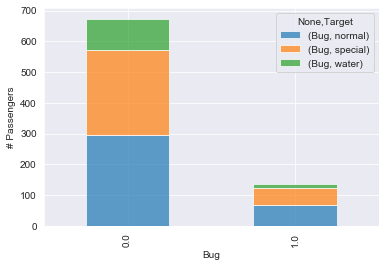

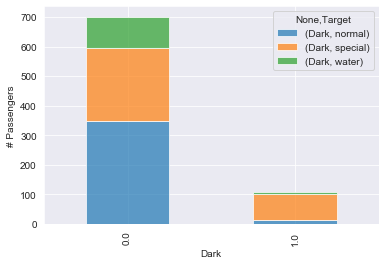

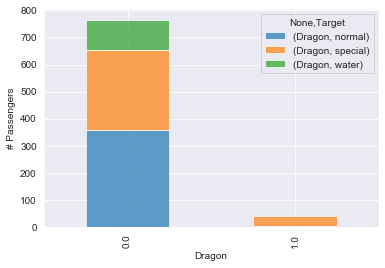

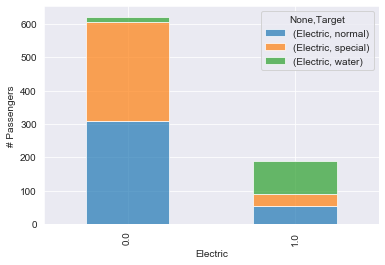

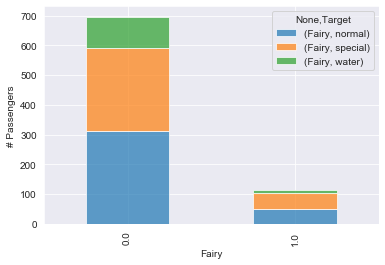

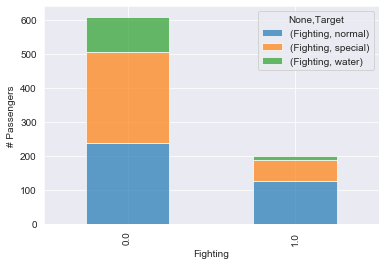

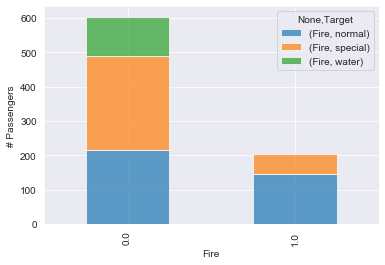

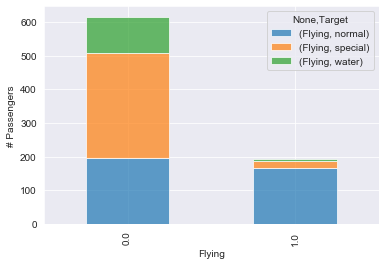

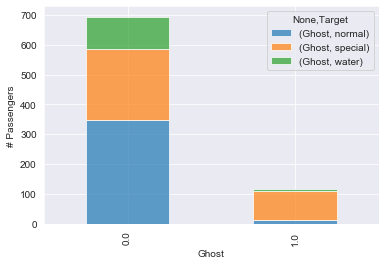

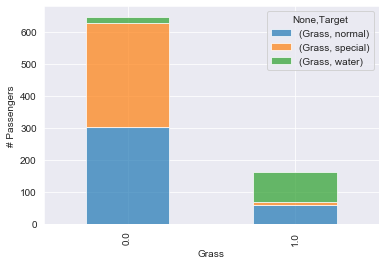

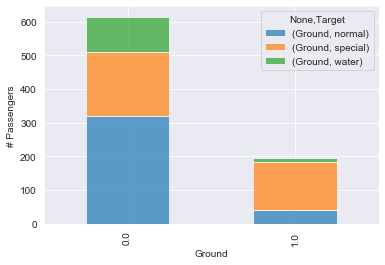

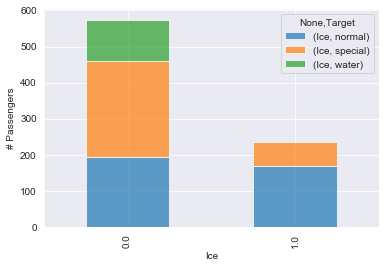

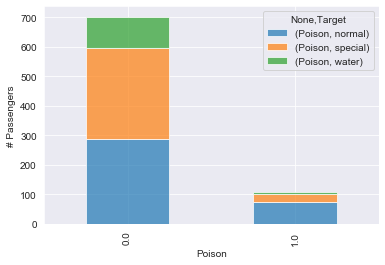

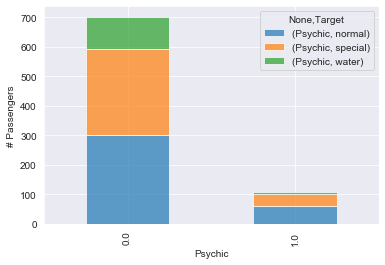

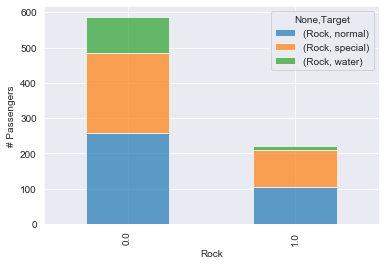

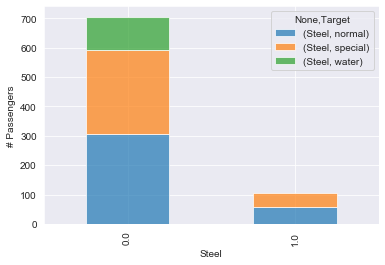

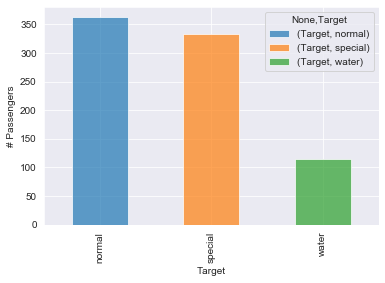

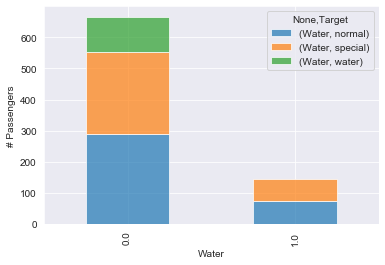

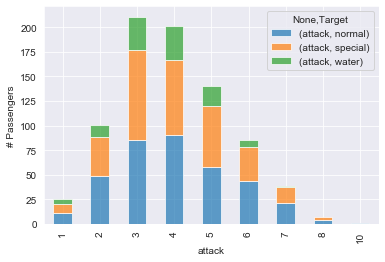

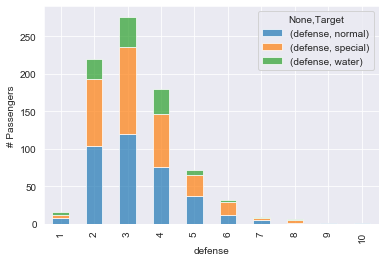

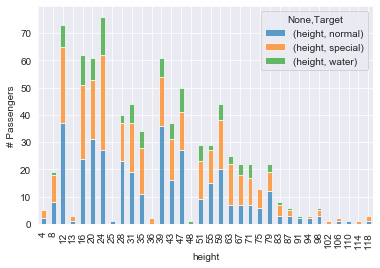

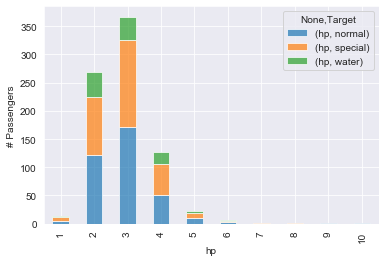

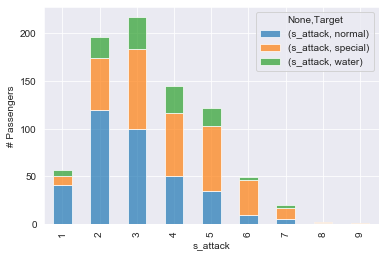

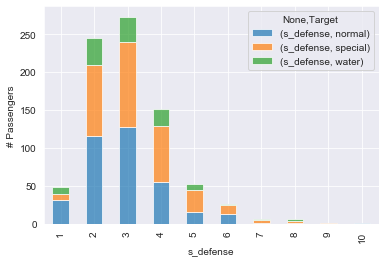

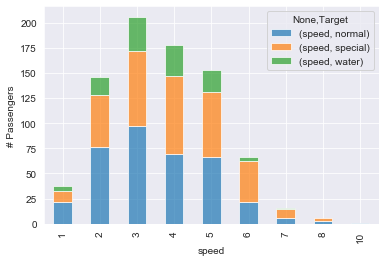

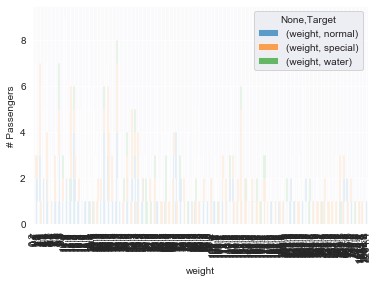

In [14]:
for i in list(df.columns):
    plot_columns_target(i)

In [15]:
# created train and test dataset
from sklearn.model_selection import train_test_split

y = df.Target
X = df.drop('Target', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [16]:
X.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,...,Steel,Water,attack,defense,height,hp,s_attack,s_defense,speed,weight
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,3,2,28,2,3,3,3,15.2
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,3,3,39,3,4,3,3,28.7
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,4,4,79,3,5,4,4,220.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3,2,24,2,3,2,4,18.7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3,3,43,3,4,3,4,41.9


In [17]:
# switch variables to float
for i in list(X.columns):
    X[i].astype(float)


# Step 3: Fitting and Evaluating Different Models¶

We want to test a bunch of different models on our data to see which is best for classification.
0. Baseline Model
1. logistic regression
2. KNN
4. Decision Tree
5. Random Forest
6. Bagged Trees
7. AdaBoost
8. Gradient Boost
9. XGBoost
9. Support Vector Machine

# We initialize a new dataframe to store our results

In [18]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import  GridSearchCV
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# created result dataframe to save the models result
results = pd.DataFrame()


# evaluate the models
def evaluate(test, pred, model):
    return [model, precision_score(test, pred, average='weighted'), recall_score(test, pred, average = 'weighted'), accuracy_score(test, pred), f1_score(test, pred, average = 'weighted')]

# print metrics
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average= 'weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds,average='weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds,average='weighted')))
    
# plot confusion metrix
def conf_metrix(model):
    # Create the basic matrix
    plt.imshow(model,  cmap=plt.cm.Blues) 

    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Add appropriate axis scales
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Add labels to each cell
    thresh = model.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(model.shape[0]), range(model.shape[1])):
            plt.text(j, i, model[i, j],
                     horizontalalignment='center',
                     color='white' if model[i, j] > thresh else 'black')

    # Add a legend
    plt.grid(b = None)
    plt.colorbar()
    plt.show()
    
# plot the model metrix by changing test size
def eva_plot(model):
    training_precision = []
    testing_precision = []
    training_recall = []
    testing_recall = []
    training_accuracy = []
    testing_accuracy = []
    training_f1 = []
    testing_f1 = []

    for i in range(10, 95):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100.0)
        
        model_log = model.fit(X_train, y_train)
        y_hat_test = model_log.predict(X_test)
        y_hat_train = model_log.predict(X_train)

        training_precision.append(precision_score(y_train, y_hat_train, average='micro'))
        testing_precision.append(precision_score(y_test, y_hat_test, average='micro'))
        training_recall.append(recall_score(y_train, y_hat_train, average='micro'))
        testing_recall.append(recall_score(y_test, y_hat_test, average='micro'))
        training_accuracy.append(accuracy_score(y_train, y_hat_train))
        testing_accuracy.append(accuracy_score(y_test, y_hat_test))
        training_f1.append(f1_score(y_train, y_hat_train, average='micro'))
        testing_f1.append(f1_score(y_test, y_hat_test, average='micro'))
    plt.figure(figsize=(20,5))
    plt.subplot(1,4,1)
    plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
    plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
    plt.ylabel('precision')
    plt.xlabel('test size')
    plt.legend()

    
    plt.subplot(1,4, 2)
    plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
    plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
    plt.ylabel('recall')
    plt.xlabel('test size')
    plt.legend()

    
#     plt.figure(figsize=(8,4))
    plt.subplot(1,4,3)
    plt.scatter(list(range(10, 95)), training_accuracy, label='training_accuracy')
    plt.scatter(list(range(10, 95)), testing_accuracy, label='testing_accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('test size')
    plt.legend()

    
    plt.subplot(1,4,4)
    plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
    plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
    plt.ylabel('f1_score')
    plt.xlabel('test size')
    plt.legend()
    plt.show()

# 0. Baseline Model

In [19]:
from sklearn.dummy import DummyClassifier

In [20]:
# created model
# check the running time
import time
start = time.time()
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)
dummy_runtime = time.time() - start

# prediction of  the test set
dummy_pred = dummy_clf.predict(X_test)

# evaluated metrix for result table
dummy_eva = evaluate(y_test, dummy_pred, 'Baseline Model ')

In [21]:
# print matrix
print_metrics(y_test, dummy_pred)

Precision Score: 0.35598851886433586
Recall Score: 0.36419753086419754
Accuracy Score: 0.36419753086419754
F1 Score: 0.35803980234824795


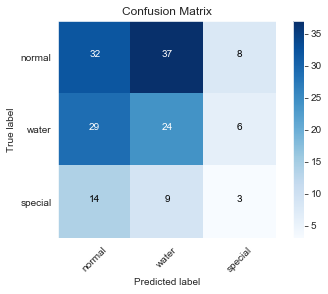

In [22]:
# plot confusion_matrix
dummy_conf_metrix = confusion_matrix(y_test, dummy_pred)
conf_metrix(dummy_conf_metrix)

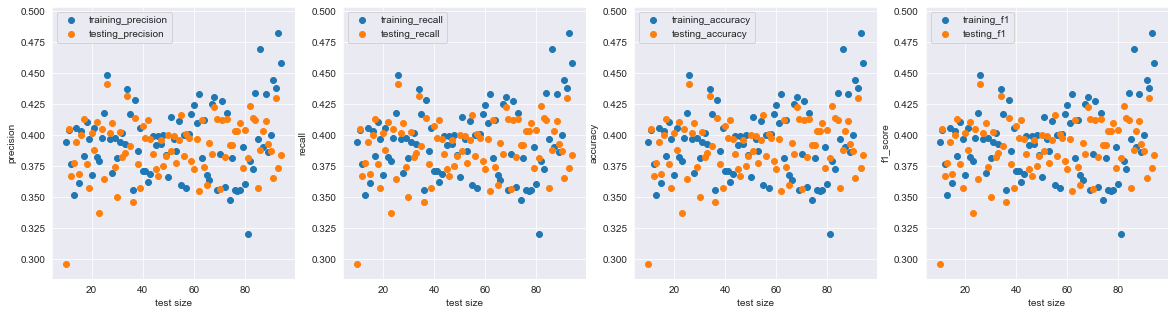

In [23]:
# plot metrixs by changing test size 
eva_plot(dummy_clf)

# 1. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max = MinMaxScaler().fit(X_train)
X_train_scaled = min_max.transform(X_train)
X_test_scaled = min_max.transform(X_test)

# created model
# check the running time
import time
start = time.time()
log_clf = LogisticRegression()
log_clf.fit(X_train_scaled, y_train)
log_runtime = time.time() - start

# prediction of  the test set
log_pred = log_clf.predict(X_test_scaled)

# evaluated metrix for result table
log_eva = evaluate(y_test, log_pred, 'Logistic Regression ')

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [26]:
# print matrix
print_metrics(y_test, log_pred)

Precision Score: 0.8915226613453009
Recall Score: 0.8888888888888888
Accuracy Score: 0.8888888888888888
F1 Score: 0.8889632397019566


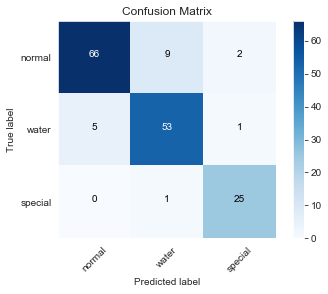

In [27]:
# plot confusion_matrix
log_conf_metrix = confusion_matrix(y_test, log_pred)
conf_metrix(log_conf_metrix)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

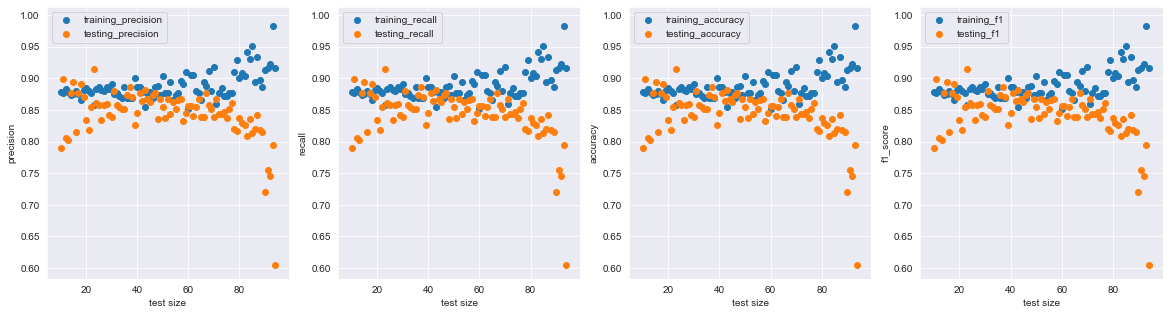

In [28]:
# plot metrixs by changing test size 
eva_plot(log_clf)

# 2. KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average = 'micro')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [31]:
find_best_k(X_train_scaled, y_train, X_test_scaled, y_test)

Best Value for k: 1
F1-Score: 0.9259259259259259


In [32]:
# created model
# check the running time
start = time.time()
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_train_scaled, y_train)
knn_runtime = time.time() - start

# prediction of  the test set
knn_pred = knn.predict(X_test_scaled)

# evaluated metrix for result table
knn_eva = evaluate(y_test, knn_pred, 'KNN')

In [33]:
# print matrix
print_metrics(y_test, knn_pred)

Precision Score: 0.9284821389062728
Recall Score: 0.9259259259259259
Accuracy Score: 0.9259259259259259
F1 Score: 0.9262927839446192


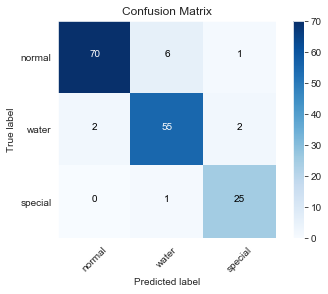

In [34]:
# plot confusion_matrix
knn_conf_metrix = confusion_matrix(y_test, knn_pred)
conf_metrix(knn_conf_metrix)

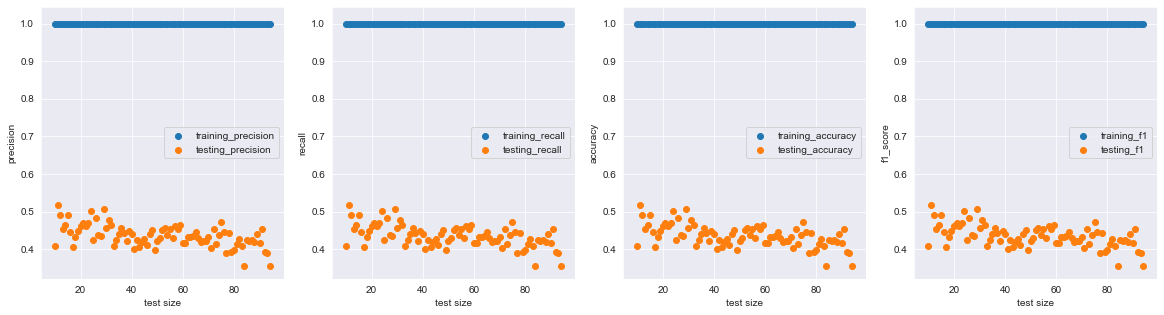

In [35]:
# plot metrixs by changing test size 
eva_plot(knn_classifier)

# 3. Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
# created model
# check the running time
start = time.time()
dt_clf = DecisionTreeClassifier() 
dt_clf.fit(X_train, y_train) 
dt_runtime = time.time() - start

# prediction of  the test set
dt_pred = dt_clf.predict(X_test)

# evaluated metrix for result table
dt_eva = evaluate(y_test, dt_pred, 'Decision Tree')

In [38]:
# print matrix  
print_metrics(y_test, dt_pred)

Precision Score: 0.8384713702286969
Recall Score: 0.8333333333333334
Accuracy Score: 0.8333333333333334
F1 Score: 0.8329119422861881


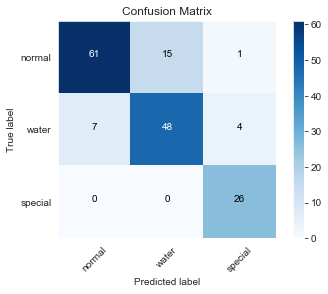

In [39]:
# plot confusion_matrix
dt_conf_metrix = confusion_matrix(y_test, dt_pred)
conf_metrix(dt_conf_metrix)

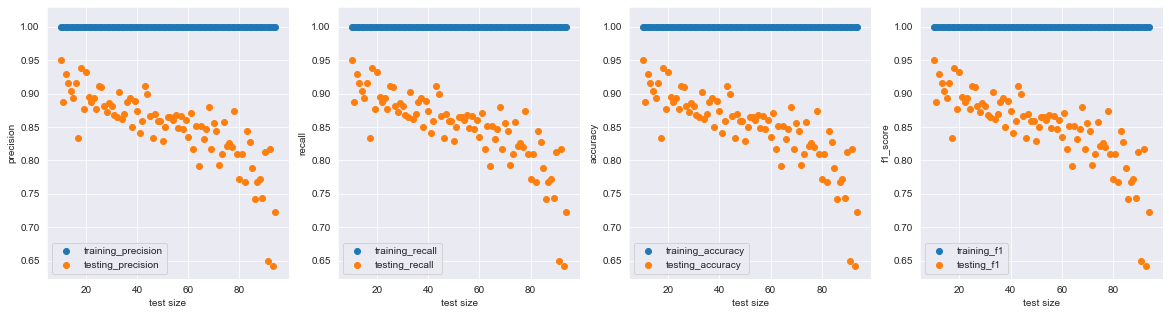

In [40]:
# plot metrixs by changing test size 
eva_plot(dt_clf)

In [41]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
import numpy as np


# Create DOT data
dot_data = export_graphviz(dt_clf, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data) 

# 4. Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# created model
# check the running time
start = time.time()
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_runtime = time.time() - start

# prediction of  the test set
rf_pred = rf_clf.predict(X_test) 

# evaluated metrix for result table
rf_eva = evaluate(y_test, rf_pred, 'Random Forest')

In [44]:
# print matrix 
print_metrics(y_test, rf_pred)

Precision Score: 0.8871955865383097
Recall Score: 0.8827160493827161
Accuracy Score: 0.8827160493827161
F1 Score: 0.8832205146322792


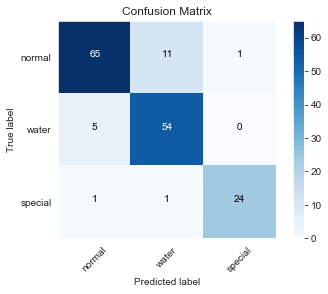

In [45]:
# plot confusion_matrix
rf_conf_metrix = confusion_matrix(y_test, rf_pred)
conf_metrix(rf_conf_metrix)

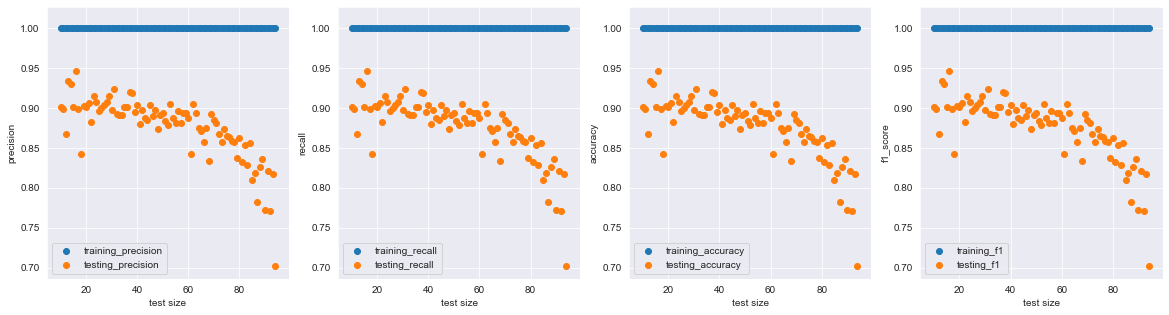

In [46]:
# plot metrixs by changing test size 
eva_plot(rf_clf)

# 5. Bagged Tree

In [47]:
from sklearn.ensemble import BaggingClassifier

In [48]:
# created model
# check the running time
start = time.time()
bt_clf = BaggingClassifier(n_estimators= 100)
bt_clf.fit(X_train, y_train)
bt_runtime = time.time() - start

# prediction of  the test set
bt_pred = bt_clf.predict(X_test)

# evaluated metrix for result table
bt_eva = evaluate(y_test, bt_pred, 'Bagged Trees')

In [49]:
# print metrix
print_metrics(y_test, bt_pred)

Precision Score: 0.887485970819304
Recall Score: 0.8827160493827161
Accuracy Score: 0.8827160493827161
F1 Score: 0.883399784572044


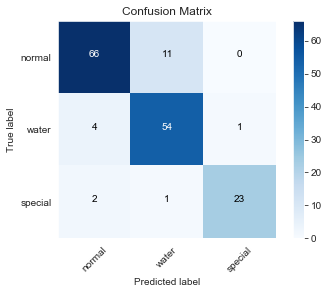

In [50]:
# plot confusion_matrix
bt_conf_metrix = confusion_matrix(y_test, bt_pred)
conf_metrix(bt_conf_metrix)

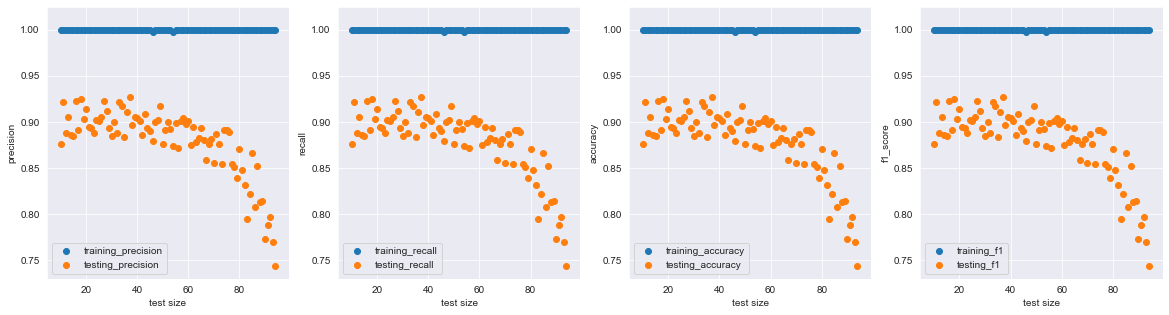

In [51]:
# plot metrixs by changing test size 
eva_plot(bt_clf)

# 6. AdaBoost

In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
# created model
# check the running time
start = time.time()
ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(X_train, y_train)
ada_runtime = time.time() - start

# prediction of  the test set
ada_pred = ada_clf.predict(X_test)

# evaluated metrix for result table
ada_eva = evaluate(y_test, ada_pred, 'AdaBoost')

In [54]:
# print metrix
print_metrics(y_test, ada_pred)

Precision Score: 0.6939121176926054
Recall Score: 0.6666666666666666
Accuracy Score: 0.6666666666666666
F1 Score: 0.6625236118153083


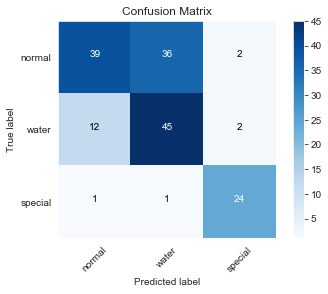

In [55]:
# plot confusion_matrix
ada_conf_metrix = confusion_matrix(y_test, ada_pred)
conf_metrix(ada_conf_metrix)

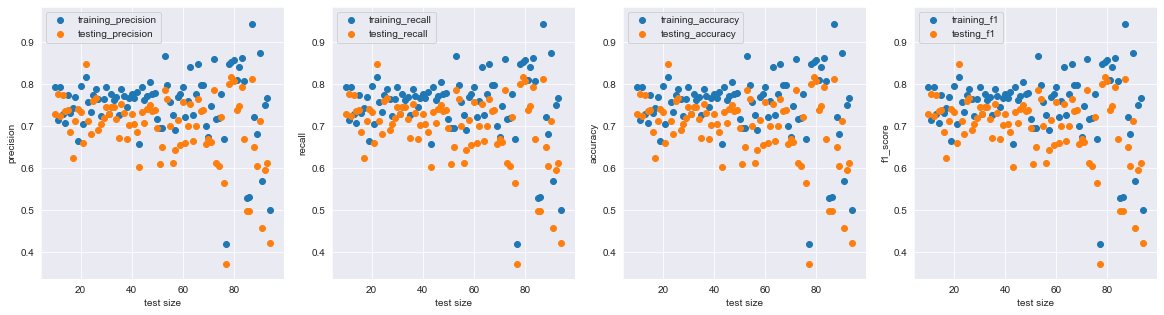

In [56]:
# plot metrixs by changing test size 
eva_plot(ada_clf)

# 7.Gradient Boost

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
# created model
# check the running time
start = time.time()
gbt_clf = GradientBoostingClassifier(n_estimators=100)
gbt_clf.fit(X_train, y_train)
gb_runtime = time.time() - start

# prediction of  the test set
gbt_pred = gbt_clf.predict(X_test)

# evaluated metrix for result table
gbt_eva = evaluate(y_test, gbt_pred, 'Gradient Boosting')

In [59]:
# print metrix
print_metrics(y_test, gbt_pred)

Precision Score: 0.8867281492885358
Recall Score: 0.8827160493827161
Accuracy Score: 0.8827160493827161
F1 Score: 0.8825186429835563


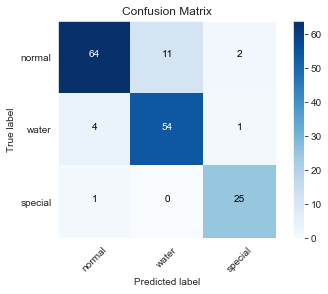

In [60]:
# plot confusion_matrix
gbt_conf_metrix = confusion_matrix(y_test, gbt_pred)
conf_metrix(gbt_conf_metrix)

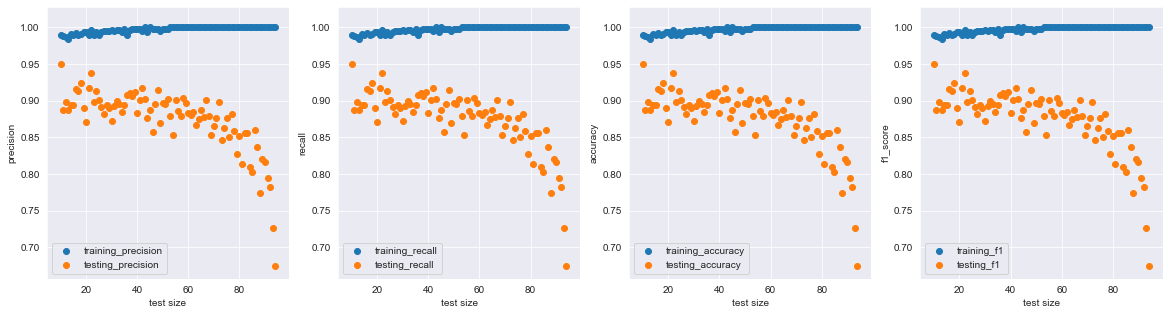

In [61]:
# plot metrixs by changing test size 
eva_plot(gbt_clf)

# 8. XGBoost

In [62]:
from xgboost import XGBClassifier

In [63]:
# created model
# check the running time
start = time.time()
xgb_clf = XGBClassifier(n_estimators=100)
xgb_clf.fit(X_train, y_train)
xgb_runtime = time.time() - start

# prediction of  the test set
xgb_pred = xgb_clf.predict(X_test)

# evaluated metrix for result table
xgb_eva = evaluate(y_test, xgb_pred, 'XGBoost')

In [64]:
# print matrix
print_metrics (y_test, xgb_pred)

Precision Score: 0.899857855708634
Recall Score: 0.8950617283950617
Accuracy Score: 0.8950617283950617
F1 Score: 0.8951231217432648


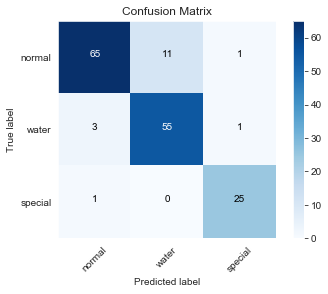

In [65]:
# plot confusion_matrix
xgb_conf_metrix = confusion_matrix(y_test, xgb_pred)
conf_metrix(xgb_conf_metrix)

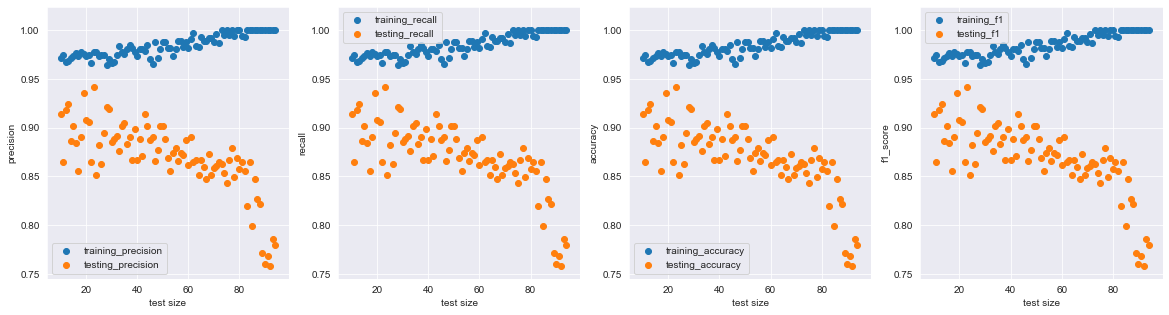

In [66]:
# plot metrixs by changing test size 
eva_plot(xgb_clf)

# 9. Support Vector Machine

In [67]:
from sklearn.svm import SVC

In [68]:
# created model
# check the running time
scl = StandardScaler().fit(X_train)
X_train_scaled = scl.transform(X_train)
X_test_scaled = scl.transform(X_test)

start = time.time()
svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)
svm_runtime = time.time() - start

# prediction of  the test set
svm_pred = svm_clf.predict(X_test_scaled)

# evaluated metrix for result table
svm_eva = evaluate(y_test, svm_pred, 'Support Vector Machine')

In [69]:
# print matrix
print_metrics(y_test, svm_pred)

Precision Score: 0.9174432116461102
Recall Score: 0.9135802469135802
Accuracy Score: 0.9135802469135802
F1 Score: 0.9132333208262134


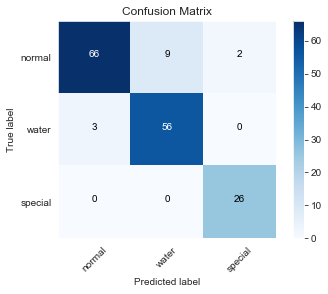

In [70]:
# plot confusion_matrix
svm_conf_metrix = confusion_matrix(y_test, svm_pred)
conf_metrix(svm_conf_metrix)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

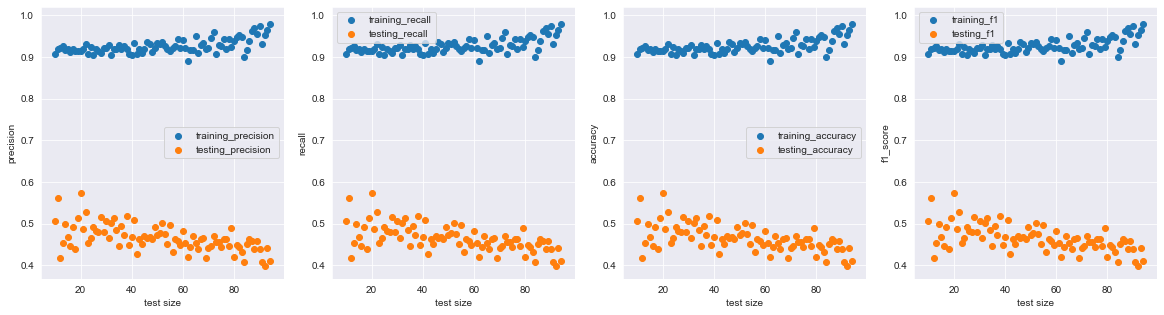

In [71]:
# plot metrixs by changing test size 
eva_plot(svm_clf)

# Results

In [72]:
results = results.append([dummy_eva,log_eva, knn_eva, dt_eva, rf_eva, bt_eva, ada_eva, gbt_eva, xgb_eva, svm_eva])
results.columns = ['Model', 'Precision Score', 'Recall Score', 'Accuracy Score', 'F1 Score']
results['Model Runtime'] = [dummy_runtime, log_runtime,knn_runtime, dt_runtime, rf_runtime, bt_runtime, ada_runtime, gb_runtime,xgb_runtime, svm_runtime]
results

,Model,Precision Score,Recall Score,Accuracy Score,F1 Score,Model Runtime
0,Baseline Model,0.355989,0.364198,0.364198,0.358040,0.000672
1,Logistic Regression,0.891523,0.888889,0.888889,0.888963,0.006908
2,KNN,0.928482,0.925926,0.925926,0.926293,0.001546
3,Decision Tree,0.838471,0.833333,0.833333,0.832912,0.003220
4,Random Forest,0.887196,0.882716,0.882716,0.883221,0.080675
5,Bagged Trees,0.887486,0.882716,0.882716,0.883400,0.148032
6,AdaBoost,0.693912,0.666667,0.666667,0.662524,0.136872
7,Gradient Boosting,0.886728,0.882716,0.882716,0.882519,0.261756
8,XGBoost,0.899858,0.895062,0.895062,0.895123,0.274228
9,Support Vector Machine,0.917443,0.913580,0.913580,0.913233,0.012124
